# Tarea 1B
***Autores:** Pablo Montes, Joaquín Pelle y Oscar Reula*
### Importante 1: ###
Este notebook está diseñado para ejecutar en Julia.

### Importante 2: ###
Renombre el archivo como (según corresponda): 
**apellido_nombre_tarea_1.ipynb** o **grupo_tarea_1.ipynb**

**Todo el código generado y la presentación deberá estar incluida en este notebook.**

**Antes de entregar, serciorese que todas las variables estén bien definidas, para ello interrumpa el kernel y corra todo desde cero.**

**El objetivo de las primeras tareas (A y B) es variado:**

1. Construir algunos integradores simples y aplicarlos a problemas en 1 y 2 dimensiones.
2. Estudiar convergencia y determinar el factor Q del método.
3. Estudia la región de convergencia de los métodos.
4. Comprobar cualitativa y cuantitativamente los errores de la aproximación.
5. Familiarizarse con las librerías de integradores de ODEs.
6. Familiarizarse con el manejo y estudio de soluciones para casos de complejidad media.
7. Estudiar el caso stiff y los métodos IMEX.

### Nota importante
A partir de ahora utilizaremos el paquete `DifferentialEquations`, que tiene ya implementados los integradores de Euler, Runge-Kutta, y otros. Haga todos los ejercicios utilizando este paquete.

In [198]:
import Pkg; Pkg.add("DifferentialEquations")

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [199]:
using DifferentialEquations
using Plots

## Problema 1
En el directorio `Dipolo_mag_3d` encontrará un notebook de Julia que realiza una integración de una partícula cargada en presencia de un dipolo magnético. Este notebook utiliza `DifferentialEquations` para resolver dicho problema. Juegue con las soluciones y la librería, y trate de entender cómo funciona. Ejecute distintas condiciones initiales, cambie las tolerancias, cambie los métodos, etc. La idea es únicamente que se familiarize con el paquete, no hace falta que presente nada respecto a este ejercicio.


*Nota: si quiere probar otros métodos además de Euler y Runge Kutta, puede consultar los métodos disponibles en el paquete en 
https://diffeq.sciml.ai/stable/solvers/ode_solve/*

*Puede consultar también https://diffeq.sciml.ai/stable/tutorials/ode_example/ para un pequeño tutorial del paquete.*

In [200]:
#=
Revisamos y estudiamos el notebook "Motion_in_magnetic_dipole_field_julia" (dudas?)
=#

## Problema 2
**Estabilidad numérica**

***2a)***
Volvamos nuevamente la ecuación del notebook anterior

$$
\frac{dy}{dt} = \lambda y
$$

Resuelva la ecuación con $\lambda = -1$ en el intervalo temporal $[0,20]$, con $N = 100, 50, 30, 20, 10, 5$ (es decir, para $\Delta t$ creciente). Experimente nuevamente con Euler y Runge-Kutta y grafique. ¿Qué observa?

*Nota: utilice en la función `solve` los argumentos opcionales `saveat = dt` y `adaptive = false`.
Ejemplo:*
```julia
sol = solve(prob, RK4(), dt = dt, saveat = dt, adaptive = false)
```
*Puede averiguar más sobre estas opciones en https://diffeq.sciml.ai/stable/basics/common_solver_opts/ o preguntar en clases o en el aula virtual.*

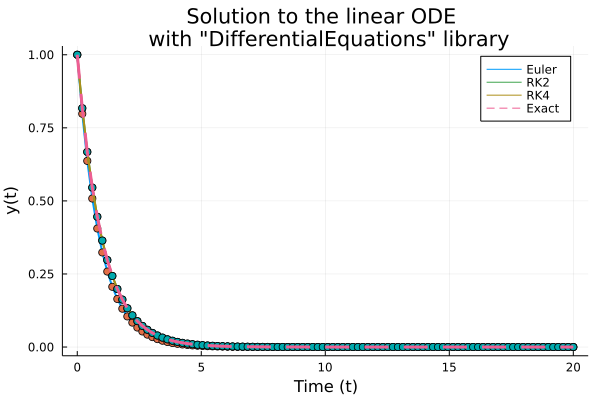

In [201]:
λ=-1.
f(y,λ,t) = λ*y                                         # definimos función (término derecho de la ODE)
y0 = 1.                                                # condición inicial
tspan = (0.,20.)                                       # intervalo de solución (tupla)
N=100;dt=(tspan[2]-tspan[1])/(N-1.)                    # definimos time step
prob = ODEProblem(f,y0,tspan,λ)                        # definimos el problema

sol_Euler = solve(prob,Euler(),dt=dt,saveat=dt,adaptive=false)   # resolvemos la ODE con Euler method
sol_RK2 = solve(prob,DP5(),dt=dt,saveat=dt,adaptive=false)       # resolvemos la ODE con RK4 method
sol_RK4 = solve(prob,RK4(),dt=dt,saveat=dt,adaptive=false)       # resolvemos la ODE con RK4 method

# ploteamos resultados
plt = plot()
plot!(plt,title="Solution to the linear ODE \n with \"DifferentialEquations\" library",xaxis="Time (t)",yaxis="y(t)")
plot!(plt,sol_Euler.t,sol_Euler,lw=2,label="Euler")
scatter!(plt,sol_Euler.t,sol_Euler,lw=2,label="")
plot!(plt,sol_RK2.t,sol_RK2,lw=2,label="RK2")
scatter!(plt,sol_RK2.t,sol_RK2,lw=2,label="")
plot!(plt,sol_RK4.t,sol_RK4,lw=2,label="RK4")
scatter!(plt,sol_RK4.t,sol_RK4,lw=2,label="")
plot!(sol_Euler.t, t->y0*exp(λ*t),lw=3,ls=:dash,label="Exact")

***2b)*** Use el notebook *region_de_estabilidad* para investigar la región de convergencia de varios métodos de las librerías. Simplemente lea el notebook, entiéndalo, y corra los ejemplos, no hace falta que agregue nada. Pregunte en clase todas sus dudas.

In [202]:
#=
Revisamos y estudiamos el notebook "región de estabilidad" (dudas?)
=#

## Problema 3
Construya su propio código para su ecuación favorita (alguna que no sea muy complicada, en la página del paquete DifferentialEquations de Julia hay varios ejemplos, o puede usar el dipolo 2D (orbitas coplanares)). Evolucione con distintas tolerancias, con paso fijo (vea como se hace esto en cada caso, use métodos fijos o adaptativos). Grafique diferencias de soluciones con distinta resolución o tolerancia y/o con distintos datos iniciales muy próximos.
Estudie convergencia, encuentre soluciones con distintos pasos (fijos), haga los cocientes y grafique el factor $Q$.

In [203]:
#Función auxiliar para calcular el factor Q.
#Simplemente calcule tres soluciones con distintos dt
#Si sol_1 usa N+1 puntos, sol_2 debe usar 2N+1 y sol4 usar 4N+1.
#No olvide utilizar `adaptive = false` y `saveat = dt` 
using LinearAlgebra

function Q(t,sol_1,sol_2,sol_4)
    return norm(sol_1(t)[:] - sol_2(t)[1:2:end],2)/norm(sol_2(t)[1:2:end]-sol_4(t)[1:4:end],2)
end

Q (generic function with 1 method)

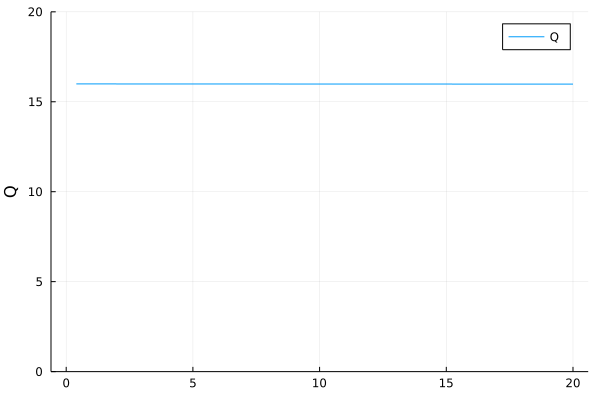

In [204]:
#Ejemplo simple
using Plots
λ = -im
T = (0.0,20.0)
N = 51
dt = (T[2]-T[1])/(N-1)
function CrecimientoExponencial!(du, u, par, t)
    λ = par
    du .= λ*u
end
y0 = [1.0+ 1.0im]
prob = ODEProblem(CrecimientoExponencial!,y0,T,λ);
#t = T[1]:dt:T[2]

sol_1 = solve(prob, RK4(), dt = dt  , saveat = dt,   adaptive = false);
sol_2 = solve(prob, RK4(), dt = dt/2, saveat = dt/2, adaptive = false);
sol_4 = solve(prob, RK4(), dt = dt/4, saveat = dt/4, adaptive = false);
plot(sol_1.t,map(t -> Q(t,sol_1,sol_2,sol_4),sol_1.t), yaxis=("Q",(0.,20)), label="Q")

In [205]:
using LaTeXStrings

### Péndulo Doble
El péndulo doble consiste enun péndulo simple cuyo extremo pende un segundo péndulo. Para más información se pueden consultar los siguientes links:

+ [Wiki page](https://upload.wikimedia.org/wikipedia/commons/7/78/Double-Pendulum.svg)
+ [Double pendulum simulation](https://www.myphysicslab.com/pendulum/double-pendulum-en.html)

las ecuaciones de movimiento para el méndulo doble se derivan en forma directa del Lagrangiano del sistema

\begin{equation}
    \mathscr{L}=\frac{1}{2}(m_1+m_2)(l_1)^2\left( \dot{\theta_1}\right)^2+\frac{1}{2}m_2(l_2)^2\left( \dot{\theta_2}\right)^2+\\
    +\frac{1}{2}m_2l_1l_2\dot{\theta_1}\dot{\theta_2}cos(\theta_1-\theta_2)+
    (m_1+m_2)gl_2cos(\theta_1)+m_2gl_2cos(\theta_2)\\
\end{equation}

Las ecuaciones acopladas resultantes para $\theta_1$ y $\theta_2$ son la siguientes:

\begin{align*}
    (m_1+m_2)l_1\ddot{\theta_1}+m_2l_2\ddot{\theta_2}cos(\theta_1-\theta_2)+m_2l_2\left( \dot{\theta_2}\right)^2sin(\theta_1-\theta_2)+g(m_1+m_2)sin(\theta_1)=0 \\
    m_1l_1\ddot{\theta_2}+m_2l_1\ddot{\theta_1}cos(\theta_1-\theta_2)-m_2l_1\left( \dot{\theta_1}\right)^2sin(\theta_1-\theta_2)+gm_2sin(\theta_2)=0 \\
\end{align*}

De las cuales se puede despejar:

\begin{align*}
    \ddot{\theta_1}=\frac{\left\{ -(1+\alpha)\gamma sin(\theta_1)-\alpha\beta\left( \dot{\theta_2}\right)^2sin(\Delta\theta)-\alpha\cos(\Delta\theta)\left[ \left( \dot{\theta_1}\right)^2sin(\Delta\theta)-\gamma sin(\theta_2) \right] \right\}}{\left\{ 1+\alpha \left[ sin(\Delta\theta) \right]^2 \right\}}=f_1(\theta_1,\theta_2,\dot{\theta_1},\dot{\theta_2})\\

    \ddot{\theta_2}=\frac{(1+\alpha)\left[\left(\dot{\theta_1}\right)^2 sin(\Delta\theta)-\gamma sin(\theta_2)\right]+cos(\Delta\theta)\left[ (1+\alpha)\gamma sin(\theta_1)+\alpha\beta\left(\dot{\theta_2} \right)^2 sin(\Delta\theta)\right]}{\left\{ 1+\alpha \left[ sin(\Delta\theta) \right]^2 \right\}}=f_2(\theta_1,\theta_2,\dot{\theta_1},\dot{\theta_2})\\
\end{align*}

Donde hemos introducido los parámetros adimensionales $\alpha={m_1}/{m_2};\beta={l_2}/{l_1}$ y las cantidades $\gamma={g}/{l_1}$ (que tiene unidades de $[\gamma]\equiv [s]^{-2}$) y la diferencia de fases $\Delta\theta=(\theta_1-\theta_2)$.

Entonces, llevamos este sistema de dos ecuaciones de 2do orden a uno de cuatro ecuaciones de primer orden de la forma:

<!-- ESTA PARTE NO FUNCIONA -->
<!-- \begin{equation}
    \frac{d \overrightarrow{y}}{dt}=\overrightarrow{f}\\
    \overrightarrow{y}=\mqty(\theta_1 \\ \theta_2 \\ \omega_1 \\ \omega_2);
    \overrightarrow{f}=\mqty(\omega_1 \\ \omega_2 \\ f_1 \\ f_2)
end{equation} -->

\begin{align*}
    \dot{\theta_1}=\omega_1\\
    \dot{\theta_2}=\omega_2\\
    \dot{\omega_1}=f_1\\
    \dot{\omega_1}=f_2\\
\end{align*}

In [206]:
m1=1.0;m2=3.0*m1;   # masas
g=9.81;             # aceleración de la gravedad
l1=2.0*g;l2=g;      # longitudes de los péndulos

α=m2*(1.0/m1);β=l2*(1.0/l1);γ=g*(1.0/l1); # parámetros adimensionales

In [207]:
# Definimos el término derecho de la ODE
function double_pendulum!(du,u,param,t)
    ∂θ1_pow2 = u[1]*u[1]
    ∂θ2_pow2 = u[2]*u[2]
    Δθ = (u[1]-u[2])
    α=param[1];β=param[2];γ=param[3];
    denom = (1.0+α*sin(Δθ)*sin(Δθ))
    num1 = (-(1.0+α)*γ*sin(u[1])-α*β*∂θ2_pow2*sin(Δθ)-α*cos(Δθ)*(∂θ1_pow2*sin(Δθ)-γ*sin(u[2])))
    num2 = ((1.0+α)*(∂θ1_pow2*sin(Δθ)-γ*sin(u[2]))+cos(Δθ)*((1.0+α)*γ*sin(u[1])+α*β*∂θ2_pow2*sin(Δθ)))

    du[1]=u[3]
    du[2]=u[4]
    du[3]=num1*(1.0/denom)
    du[4]=num2*(1.0/(β*denom))
end

double_pendulum! (generic function with 1 method)

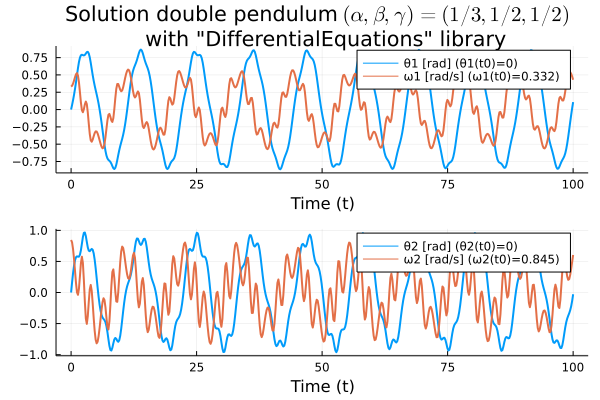

In [208]:
θ1_init=0.0;θ2_init=0.0                 # initial angular deflection
ω1_init=0.332;ω2_init=0.845             # initial angular velocity
u0=[θ1_init,θ2_init,ω1_init,ω2_init]    # initial state vector
t_interval=(0.0,100.0)                  # time interval tuple
param=(α,β,γ)                           # external parameters

N=512;dt=(t_interval[2]-t_interval[1])/(N-1.)   # definimos time step

prob = ODEProblem(double_pendulum!,u0,t_interval,param)
sol_RK4 = solve(prob,RK4(),dt=dt,saveat=dt,adaptive=false)       # resolvemos la ODE con RK4 method

plt1=plot()
plot1=plot!(plt1,title="Solution double pendulum \$(α,β,γ)=(1/3,1/2,1/2)\$ \n with \"DifferentialEquations\" library",xaxis="Time (t)")
plot1=plot!(plt1,sol_RK4.t,sol_RK4[1,:],lw=2,label="θ1 [rad] (θ1(t0)=0)")
plot1=plot!(plt1,sol_RK4.t,sol_RK4[3,:],lw=2,label="ω1 [rad/s] (ω1(t0)=0.332)")

plt2=plot()
plot2=plot!(plt2,xaxis="Time (t)")
plot2=plot!(plt2,sol_RK4.t,sol_RK4[2,:],lw=2,label="θ2 [rad] (θ2(t0)=0)")
plot2=plot!(plt2,sol_RK4.t,sol_RK4[4,:],lw=2,label="ω2 [rad/s] (ω2(t0)=0.845)")

plot!(plot1,plot2,layout=(2,1))

## Probamos con otras condiciones iniciales

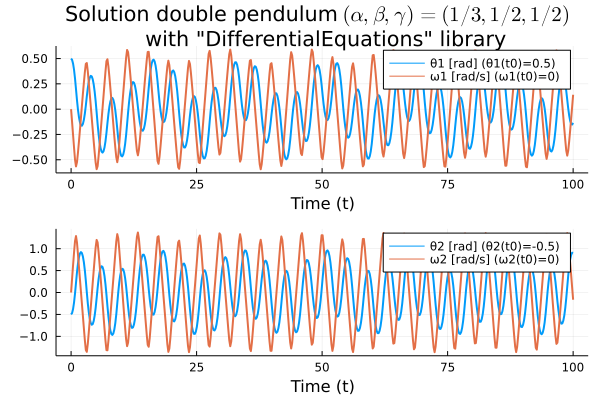

In [209]:
θ1_init=0.5;θ2_init=-0.5                 # initial angular deflection
ω1_init=0.0;ω2_init=0.0                  # initial angular velocity
u0=[θ1_init,θ2_init,ω1_init,ω2_init]    # initial state vector
t_interval=(0.0,100.0)                  # time interval tuple
param=(α,β,γ)                           # external parameters

N=512;dt=(t_interval[2]-t_interval[1])/(N-1.)   # definimos time step

prob = ODEProblem(double_pendulum!,u0,t_interval,param)
sol_RK4 = solve(prob,RK4(),dt=dt,saveat=dt,adaptive=false)       # resolvemos la ODE con RK4 method

plt1=plot()
plot1=plot!(plt1,title="Solution double pendulum \$(α,β,γ)=(1/3,1/2,1/2)\$ \n with \"DifferentialEquations\" library",xaxis="Time (t)")
plot1=plot!(plt1,sol_RK4.t,sol_RK4[1,:],lw=2,label="θ1 [rad] (θ1(t0)=0.5)")
plot1=plot!(plt1,sol_RK4.t,sol_RK4[3,:],lw=2,label="ω1 [rad/s] (ω1(t0)=0)")

plt2=plot()
plot2=plot!(plt2,xaxis="Time (t)")
plot2=plot!(plt2,sol_RK4.t,sol_RK4[2,:],lw=2,label="θ2 [rad] (θ2(t0)=-0.5)")
plot2=plot!(plt2,sol_RK4.t,sol_RK4[4,:],lw=2,label="ω2 [rad/s] (ω2(t0)=0)")

plot!(plot1,plot2,layout=(2,1))

Ahora calculamos el factor $Q$

In [210]:
# Función auxiliar para calcular función Q las cuatro soluciones

function double_pendulum_Qfactor(N,u0,t_interval,param,method)
    prob = ODEProblem(double_pendulum!,u0,t_interval,param)     # definimos el problema

    # consideramos N1=N pasos (Δt(N1)=Δt)
    dt1=(t_interval[2]-t_interval[1])/(N-1.0)                      # definimos time step
    sol_N1 = solve(prob,method(),dt=dt1,saveat=dt1,adaptive=false)  # resolvemos ODE
    
    # consideramos N2=(2N1-1) pasos (Δt(N2)=Δt/2)
    sol_N2 = solve(prob,method(),dt=dt1*0.5,saveat=dt1*0.5,adaptive=false)  # resolvemos ODE

    # consideramos N3=(4N1-3) pasos (Δt(N3)=Δt/4)
    sol_N3 = solve(prob,method(),dt=dt1*0.25,saveat=dt1*0.25,adaptive=false)  # resolvemos ODE

    return Q(sol_N1.t,sol_N1,sol_N2,sol_N3)
end


double_pendulum_Qfactor (generic function with 1 method)

In [219]:
θ1_init=0.0;θ2_init=0.0;                 # initial angular deflection
ω1_init=0.332;ω2_init=0.845;             # initial angular velocity
u0=[θ1_init,θ2_init,ω1_init,ω2_init];    # initial state vector
t_interval=(0.0,100.0);                  # time interval tuple
param=(α,β,γ);                           # external parameters

N=512;dt=(t_interval[2]-t_interval[1])/(N-1.);   # definimos time step

prob = ODEProblem(double_pendulum!,u0,t_interval,param);

sol_RK4_N1 = solve(prob, RK4(), dt = dt  , saveat = dt,   adaptive = false);
println("size(sol_RK4_N1)=",size(sol_RK4_N1));
sol_RK4_N2 = solve(prob, RK4(), dt = dt/2, saveat = dt/2, adaptive = false);
println("size(sol_RK4_N1)=",size(sol_RK4_N2));
sol_RK4_N3 = solve(prob, RK4(), dt = dt/4, saveat = dt/4, adaptive = false);
println("size(sol_RK4_N3)=",size(sol_RK4_N3));
#plot(sol_RK4_N1.t,map(t -> Q(t,sol_RK4_N1[1,:],sol_RK4_N2[1,:],sol_RK4_N3[1,:]),sol_RK4_N1.t), yaxis=("Q",(0.,20)), label="Q")

size(sol_RK4_N1)=(4, 512)
size(sol_RK4_N1)=(4, 1023)
size(sol_RK4_N3)=(4, 2045)


## Problema 4
**Opcional para personas ambiciosas** 
Busque una ecuación que sea stiff y evolucione con un método apropiado. Un caso simple es la ecuación: 

$$
\begin{array}{ll}
u_t &= v \\
v_t &= \frac{1}{\epsilon}(u - v)
\end{array}
$$
con $\epsilon > 0$ muy pequeño. Este permite usar métodos IMEX.